In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os,cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

import keras

from keras.utils import np_utils

from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from keras.layers.normalization import BatchNormalization
import os

Using TensorFlow backend.


In [2]:
data_path = './Dataset'
data_dir_list = os.listdir(data_path)

img_rows=256
img_cols=256
num_channel=1

num_epoch=10

img_data_list=[]


for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    print(len(img_list))
    for img in img_list:
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
        
        input_img_resize=cv2.resize(input_img,(48,48))
        img_data_list.append(input_img_resize)
        
img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data = img_data/255
print(img_data.shape)

Loaded the images of dataset-Hamza

30
Loaded the images of dataset-Osama

40
Loaded the images of dataset-Unknown

57
(127, 48, 48, 3)


In [3]:
num_classes = 3

num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

In [4]:
labels[0:29]=0 #30
labels[30:69]=1 #40
labels[70:127]=2 #57

names = ['Hamza','Osama','Unknown']

def getLabel(id):
    return ['Hamza','Osama','Unknown'][id]

In [5]:
Y = np_utils.to_categorical(labels, num_classes)

#Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=2)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=2)
x_test=X_test

input_shape=(48,48,3)

In [6]:
model = Sequential()
model.add(Conv2D(6, (5, 5), input_shape=input_shape, padding='same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, (5, 5), padding='same', activation = 'relu'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation = 'softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')

model.summary()
model.get_config()
model.layers[0].get_config()
model.layers[0].input_shape
model.layers[0].output_shape
model.layers[0].get_weights()
np.shape(model.layers[0].get_weights()[0])
model.layers[0].trainable

from keras import callbacks
filename='model_train_new.csv'
filepath="Best-weights-my_model-{epoch:03d}-{loss:.4f}-{acc:.4f}.hdf5"

csv_log=callbacks.CSVLogger(filename, separator=',', append=False)
checkpoint = callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [csv_log,checkpoint]
callbacks_list = [csv_log]

hist = model.fit(X_train, y_train, batch_size=7, epochs=50, verbose=1, validation_data=(X_test, y_test),callbacks=callbacks_list)

model.save("Model/model.bin")


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 6)         456       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        2416      
_________________________________________________________________
activation_1 (Activation)    (None, 24, 24, 16)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        9280      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)        

107/107 [==============================] - 1s 6ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0179 - val_accuracy: 1.0000
Epoch 43/50
107/107 [==============================] - 1s 6ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0173 - val_accuracy: 1.0000
Epoch 44/50
107/107 [==============================] - 1s 5ms/step - loss: 0.0092 - accuracy: 1.0000 - val_loss: 0.0483 - val_accuracy: 0.9500
Epoch 45/50
107/107 [==============================] - 1s 5ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.0164 - val_accuracy: 1.0000
Epoch 46/50
107/107 [==============================] - 1s 6ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.0186 - val_accuracy: 1.0000
Epoch 47/50
107/107 [==============================] - 1s 6ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.0132 - val_accuracy: 1.0000
Epoch 48/50
107/107 [==============================] - 1s 5ms/step - loss: 8.6364e-04 - accuracy: 1.0000 - val_loss: 0.0079 - val_accuracy: 1.0000
Epoch 4

In [7]:
# list all data in history
print(hist.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


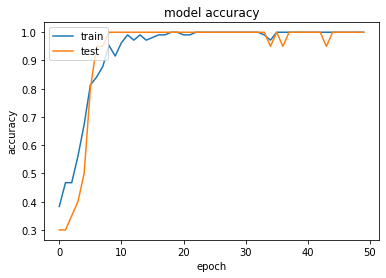

In [8]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

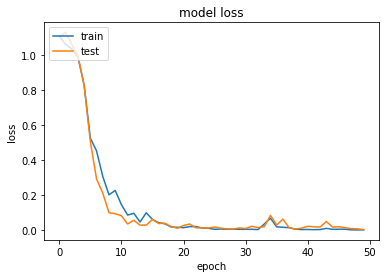

In [9]:
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [10]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

test_image = X_test[0:1]
print (test_image.shape)

print(model.predict(test_image))
print(model.predict_classes(test_image))

Test Loss: 0.002318647224456072
Test accuracy: 1.0
(1, 48, 48, 3)
[[5.1171944e-04 9.9948645e-01 1.7957327e-06]]
[1]
